<a href="https://colab.research.google.com/github/IT24100400/2025-Y2-S1-MLB-B3G2-10---Weather-related-disease-prediction---Data-Preprocessing-and-EDA-Pipeline/blob/main/NoteBooks/IT24100502_Chi_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
from google .colab import files
uploaded = files.upload()

Saving weather_disease_lowvar.csv to weather_disease_lowvar.csv


In [4]:
df_var = pd.read_csv("weather_disease_lowvar.csv")

In [5]:
X_var_df = df_var.drop(columns=["prognosis"])
y = df_var["prognosis"]

In [6]:
chi_selector = SelectKBest(score_func=chi2, k="all")
chi_selector.fit(X_var_df, y)


chi_scores = chi_selector.scores_
chi_pvalues = chi_selector.pvalues_

chi_results = pd.DataFrame({
    "Feature": X_var_df.columns,
    "Chi2_Score": chi_scores,
    "p_value": chi_pvalues
}).sort_values(by="p_value")


significant_features = chi_results[chi_results["p_value"] < 0.05]

In [7]:
significant_features = chi_results[chi_results["p_value"] < 0.05]["Feature"]
selected_features_chi2 = significant_features
df_chi2 = df_var[significant_features.tolist() + ["prognosis"]]

print("Features selected by Chi-Square:")
print(selected_features_chi2.tolist())
print("\nNew shape after Chi-Square:", df_chi2.shape)
print(df_chi2.head())


Features selected by Chi-Square:
['joint_pain', 'chest_pain', 'headache', 'pain_behind_the_eyes', 'runny_nose', 'fatigue', 'chills', 'high_fever', 'trouble_seeing', 'rapid_heart_rate', 'severe_headache', 'weakness', 'high_blood_pressure', 'nasal_polyps', 'hiv_aids', 'vomiting', 'diarrhea', 'sneezing', 'reduced_smell_and_taste', 'disease_Other', 'knee_ache', 'back_pain', 'disease_Heart Attack', 'disease_Migraine', 'itchiness', 'confusion', 'rashes', 'skin_irritation', 'facial_pain', 'sinus_headache', 'swollen_glands', 'sore_throat', 'asthma', 'cough', 'dizziness', 'nausea', 'prognosis_encoded', 'body_aches', 'fever', 'abdominal_pain', 'throbbing_headache', 'rapid_breathing', 'shortness_of_breath', 'pain_behind_eyes', 'Age', 'Temperature (C)', 'Gender']

New shape after Chi-Square: (4981, 48)
   joint_pain  chest_pain  headache  pain_behind_the_eyes  runny_nose  \
0         0.0         0.0       0.0                   0.0         0.0   
1         0.0         0.0       0.0                 

In [8]:
print("Recommended number of features (p<0.05):", significant_features.shape[0])
print("\nSignificant features:")
print(significant_features)

Recommended number of features (p<0.05): 47

Significant features:
6                  joint_pain
15                 chest_pain
14                   headache
12       pain_behind_the_eyes
11                 runny_nose
10                    fatigue
9                      chills
8                  high_fever
24             trouble_seeing
31           rapid_heart_rate
22            severe_headache
23                   weakness
21        high_blood_pressure
19               nasal_polyps
18                   hiv_aids
16                   vomiting
29                   diarrhea
28                   sneezing
38    reduced_smell_and_taste
48              disease_Other
44                  knee_ache
43                  back_pain
46       disease_Heart Attack
47           disease_Migraine
40                  itchiness
42                  confusion
34                     rashes
39            skin_irritation
36                facial_pain
35             sinus_headache
33             swollen_glands
27 

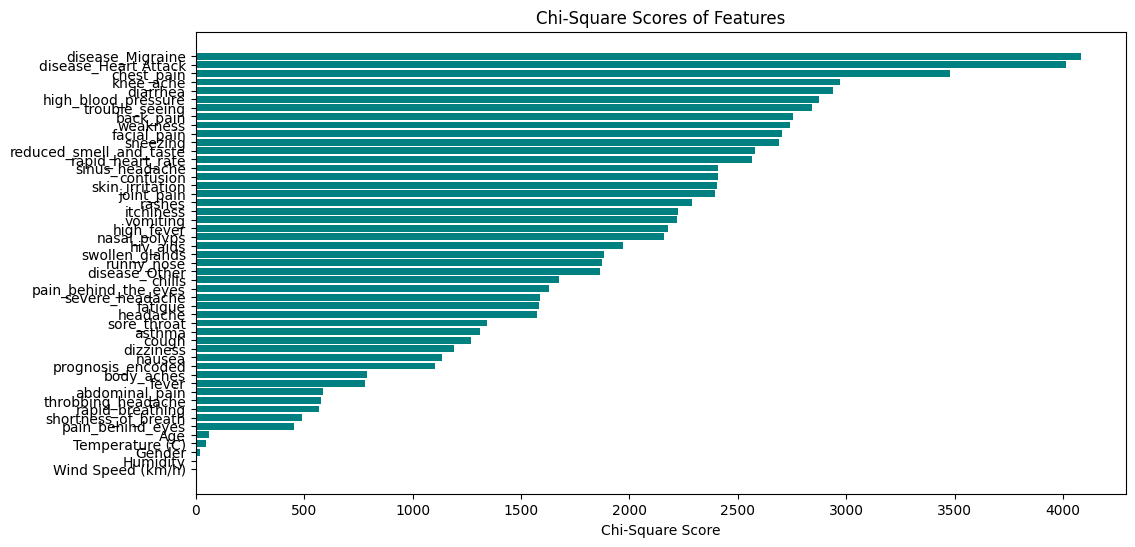

In [9]:
import matplotlib.pyplot as plt

# Sort results by Chi2 score
chi_results_sorted = chi_results.sort_values(by="Chi2_Score", ascending=False)

plt.figure(figsize=(12,6))
plt.barh(chi_results_sorted["Feature"], chi_results_sorted["Chi2_Score"], color="teal")
plt.gca().invert_yaxis()  # highest score on top
plt.title("Chi-Square Scores of Features")
plt.xlabel("Chi-Square Score")
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


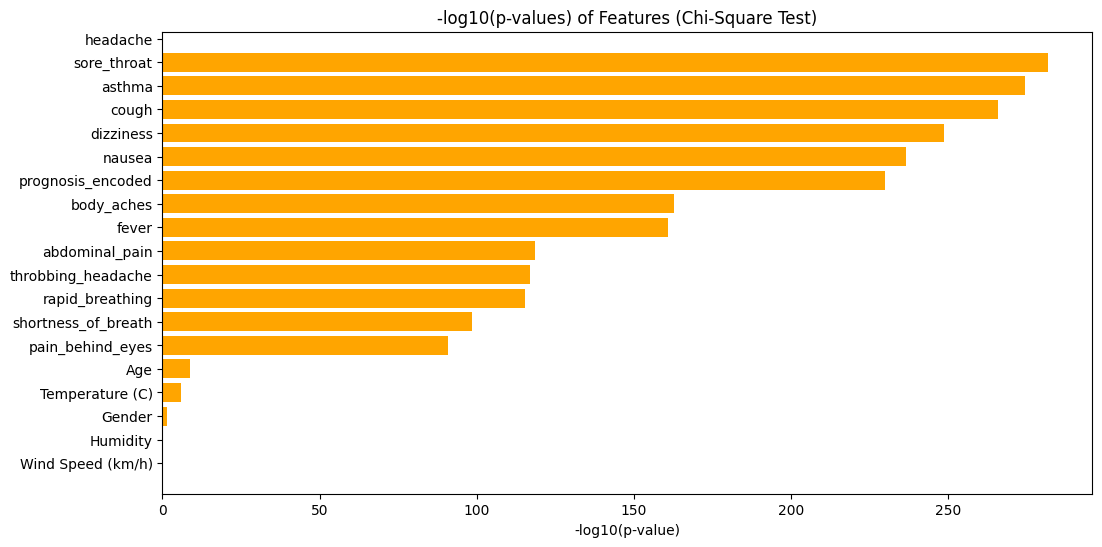

In [10]:
import numpy as np

plt.figure(figsize=(12,6))
plt.barh(chi_results_sorted["Feature"], -np.log10(chi_results_sorted["p_value"]), color="orange")
plt.gca().invert_yaxis()
plt.title("-log10(p-values) of Features (Chi-Square Test)")
plt.xlabel("-log10(p-value)")
plt.show()


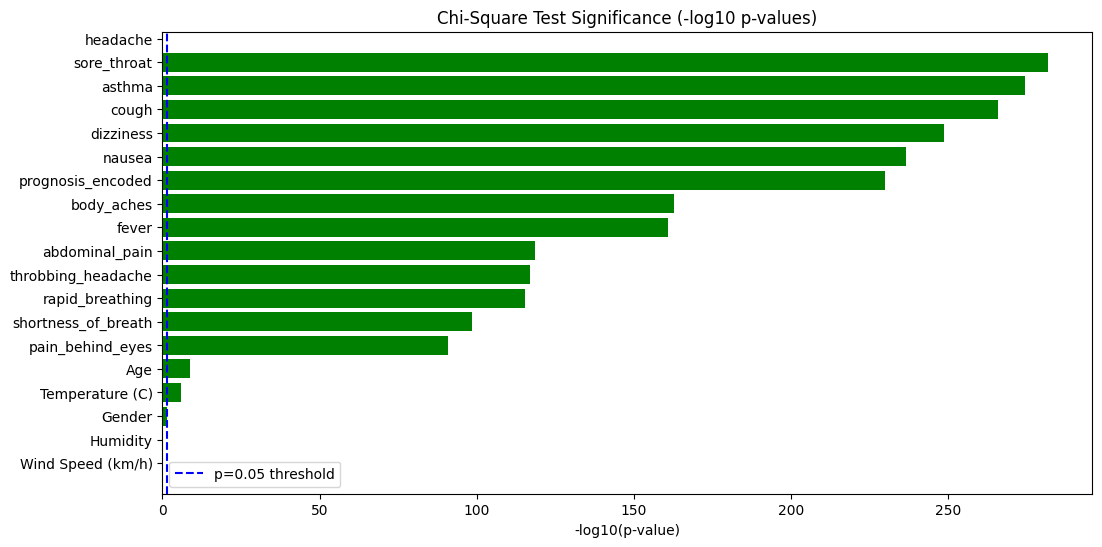

In [11]:
plt.figure(figsize=(12,6))
colors = ["green" if p < 0.05 else "red" for p in chi_results_sorted["p_value"]]
plt.barh(chi_results_sorted["Feature"], -np.log10(chi_results_sorted["p_value"]), color=colors)
plt.gca().invert_yaxis()
plt.title("Chi-Square Test Significance (-log10 p-values)")
plt.xlabel("-log10(p-value)")
plt.axvline(-np.log10(0.05), color="blue", linestyle="--", label="p=0.05 threshold")
plt.legend()
plt.show()


In [14]:
# Check for duplicate columns at the bottom
duplicate_columns = df_var.columns[df_var.columns.duplicated()].tolist()
print(f"\nDuplicate columns found: {duplicate_columns}")

# Drop duplicate columns if any exist
if duplicate_columns:
    df_var = df_var.loc[:, ~df_var.columns.duplicated()]
    print(f"Dropped duplicate columns: {duplicate_columns}")
    print(f"New shape after dropping duplicates: {df_var.shape}")

    # If duplicates were found and dropped, you might want to re-run the analysis
    print("\nNote: Duplicate columns were found and dropped. Consider re-running the analysis with the cleaned dataset.")
else:
    print("No duplicate columns found in the dataset.")


Duplicate columns found: []
No duplicate columns found in the dataset.


In [ ]:
output_path = "weather_disease_chi_Square.csv"
df_chi2.to_csv(output_path, index=False)

print("Chi-Square filtered dataset saved at:", output_path)
print("Final shape:", df_chi2.shape)
print("Features kept:", len(significant_features))

Chi-Square filtered dataset saved at: weather_disease_chi_Square.csv
Final shape: (4981, 48)
Features kept: 47


In [ ]:
from google.colab import files
files.download("/content/weather_disease_chi_Square.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>